In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  # data visualisation
import seaborn as sns #data visualization

In [17]:
data = pd.read_csv('/content/insurance.csv', skiprows=4)
data.head

<bound method NDFrame.head of      Y = total payment for all the claims in thousands of Swedish Kronor
108                                              392.5                  
19                                                46.2                  
13                                                15.7                  
124                                              422.2                  
40                                               119.4                  
..                                                 ...                  
9                                                 87.4                  
31                                               209.8                  
14                                                95.5                  
53                                               244.6                  
26                                               187.5                  

[63 rows x 1 columns]>

In [32]:
data.describe()

,Payments,Claims
count,63.000000,63.000000
mean,98.187302,22.904762
std,87.327553,23.351946
min,0.000000,0.000000
25%,38.850000,7.500000
50%,73.400000,14.000000
75%,140.000000,29.000000
max,422.200000,124.000000


In [18]:
data.rename(columns={'Y = total payment for all the claims in thousands of Swedish Kronor': 'Payments'}, inplace=True)
data.head()

,Payments
108,392.5
19,46.2
13,15.7
124,422.2
40,119.4


In [19]:
data['Claims'] = data.index
data.head()


,Payments,Claims
108,392.5,108
19,46.2,19
13,15.7,13
124,422.2,124
40,119.4,40


In [20]:
data.reset_index(drop=True, inplace=True)
data.head()

,Payments,Claims
0,392.5,108
1,46.2,19
2,15.7,13
3,422.2,124
4,119.4,40


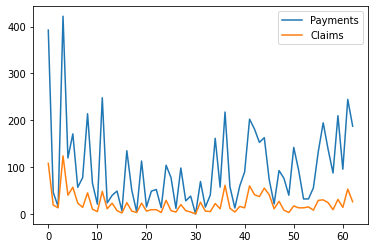

In [23]:
data.plot()

Text(0, 0.5, 'cClaims')

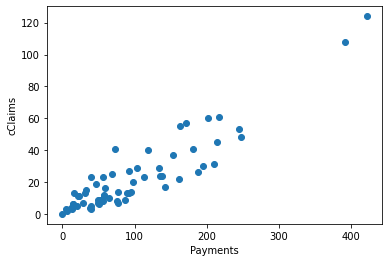

In [26]:
plt.scatter(x=data['Payments'],y=data['Claims'])
plt.xlabel("Payments")
plt.ylabel("cClaims")

In [29]:
x=data['Payments']
y=data['Claims']

Text(0, 0.5, 'payments')

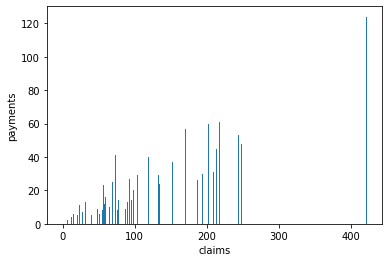

In [30]:
plt.bar(x,y)
plt.xlabel("claims")
plt.ylabel("payments")

In [31]:
correlation = data['Payments'].corr(data['Claims'])
correlation

0.9128782350234074

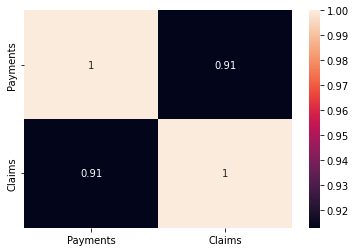

In [33]:
sns.heatmap(data.corr(), annot = True)

Linear Regression


In [34]:
 from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [35]:
x=data['Claims'].values
y=data['Payments'].values
x = x.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [37]:
reg = LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.8950819493918402

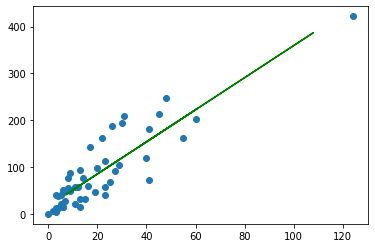

In [38]:
y_predicts = reg.predict(x_test)
plt.scatter(x=x_train, y=y_train)
plt.plot(x_test, y_predicts, color="green")

Lasso Regression

In [71]:
from sklearn.linear_model import Lasso


In [72]:
model = Lasso() 
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8950801986164431

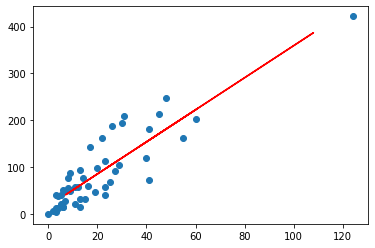

In [73]:
y_predict = model.predict(x_test)
plt.scatter(x=x_train, y=y_train)
plt.plot(x_test, y_predict, color="red")

Random Forest 

In [74]:
from sklearn.ensemble import RandomForestRegressor
reg2 = RandomForestRegressor(n_estimators=100,n_jobs=1)
reg2.fit(x_train,y_train)
reg2.score(x_test,y_test)

0.8165388115065821

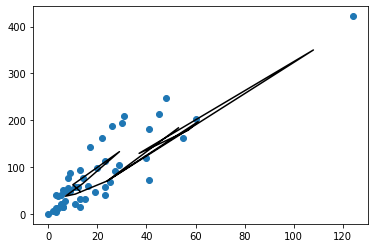

In [75]:

y_pred = reg2.predict(x_test)
plt.scatter(x=x_train, y=y_train)
plt.plot(x_test, y_pred, color="black")